# LAB 12


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris


iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Save
data.to_csv('iris_data_2.csv', index=False)

print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nClass distribution:")
print(data['species'].value_counts())

# Prepare data for binary classification
data_binary = data.copy()
data_binary['target'] = (data_binary['species'] == 'setosa').astype(int)

# Features and labels
X = data_binary.drop(['species', 'target'], axis=1)
y = data_binary['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Dataset shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Training set size: (105, 4)
Testing set size: (45, 4)


In [2]:
def create_model_1():
    """Model 1: Simple architecture (baseline)"""
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_model_2():
    """Model 2: More neurons"""
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))  # Additional layer
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_model_3():
    """Model 3: Deeper network"""
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_model_4():
    """Model 4: With dropout for regularization"""
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def create_model_5():
    """Model 5: Small network"""
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [3]:
# Define models to test
models = {
    'Model 1 (32 neurons)': create_model_1(),
    'Model 2 (64-32 neurons)': create_model_2(),
    'Model 3 (Deep: 128-64-32-16)': create_model_3(),
    'Model 4 (with Dropout)': create_model_4(),
    'Model 5 (Small: 16-8)': create_model_5()
}

# Dictionary to store results
results = {}
histories = {}

# Train eac model
for name, model in models.items():

    print(f"Training {name}")


    # Com the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Display model summ
    if name == list(models.keys())[0]:
        print("Model Summary:")
        model.summary()

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=8,
        verbose=0  # Set to 1 to see training progress
    )

    # Store history
    histories[name] = history

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'accuracy_score': acc,
        'confusion_matrix': cm,
        'history': history
    }

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")

c:\Users\aabidkhokhar\.conda\envs\global_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model 1 (32 neurons)
Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Test Accuracy: 1.0000
Accuracy Score: 1.0000
Confusion Matrix:
[[30  0]
 [ 0 15]]
Training Model 2 (64-32 neurons)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Test Accuracy: 1.0000
Accuracy Score: 1.0000
Confusion Matrix:
[[30  0]
 [ 0 15]]
Training Model 3 (Deep: 128-64-32-16)
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E4E93C3600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and

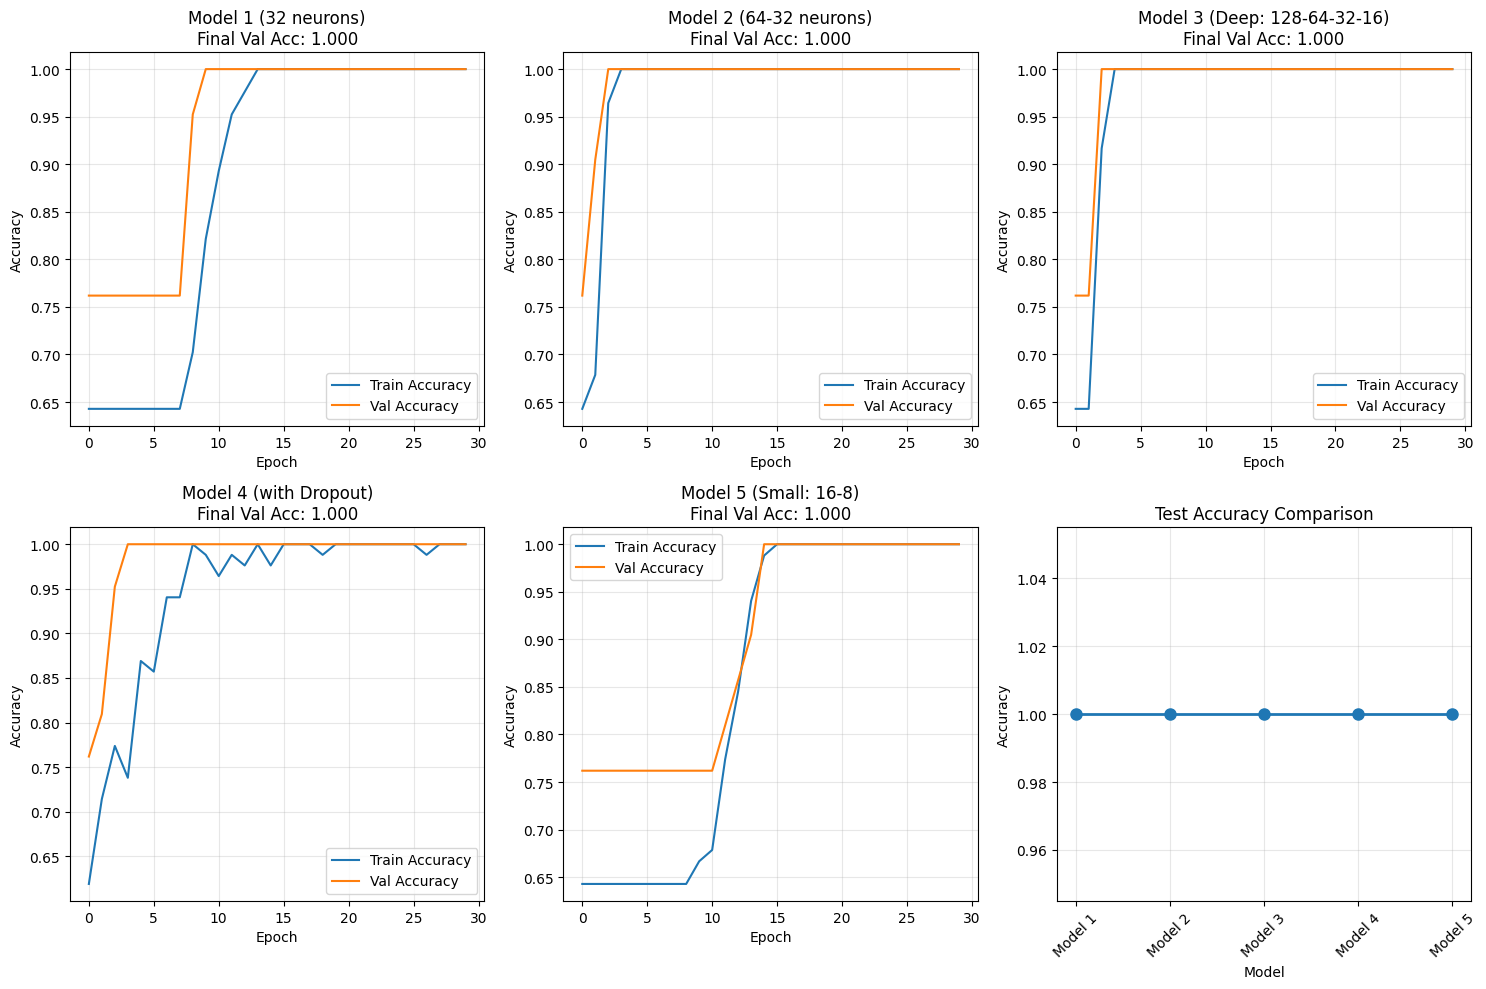

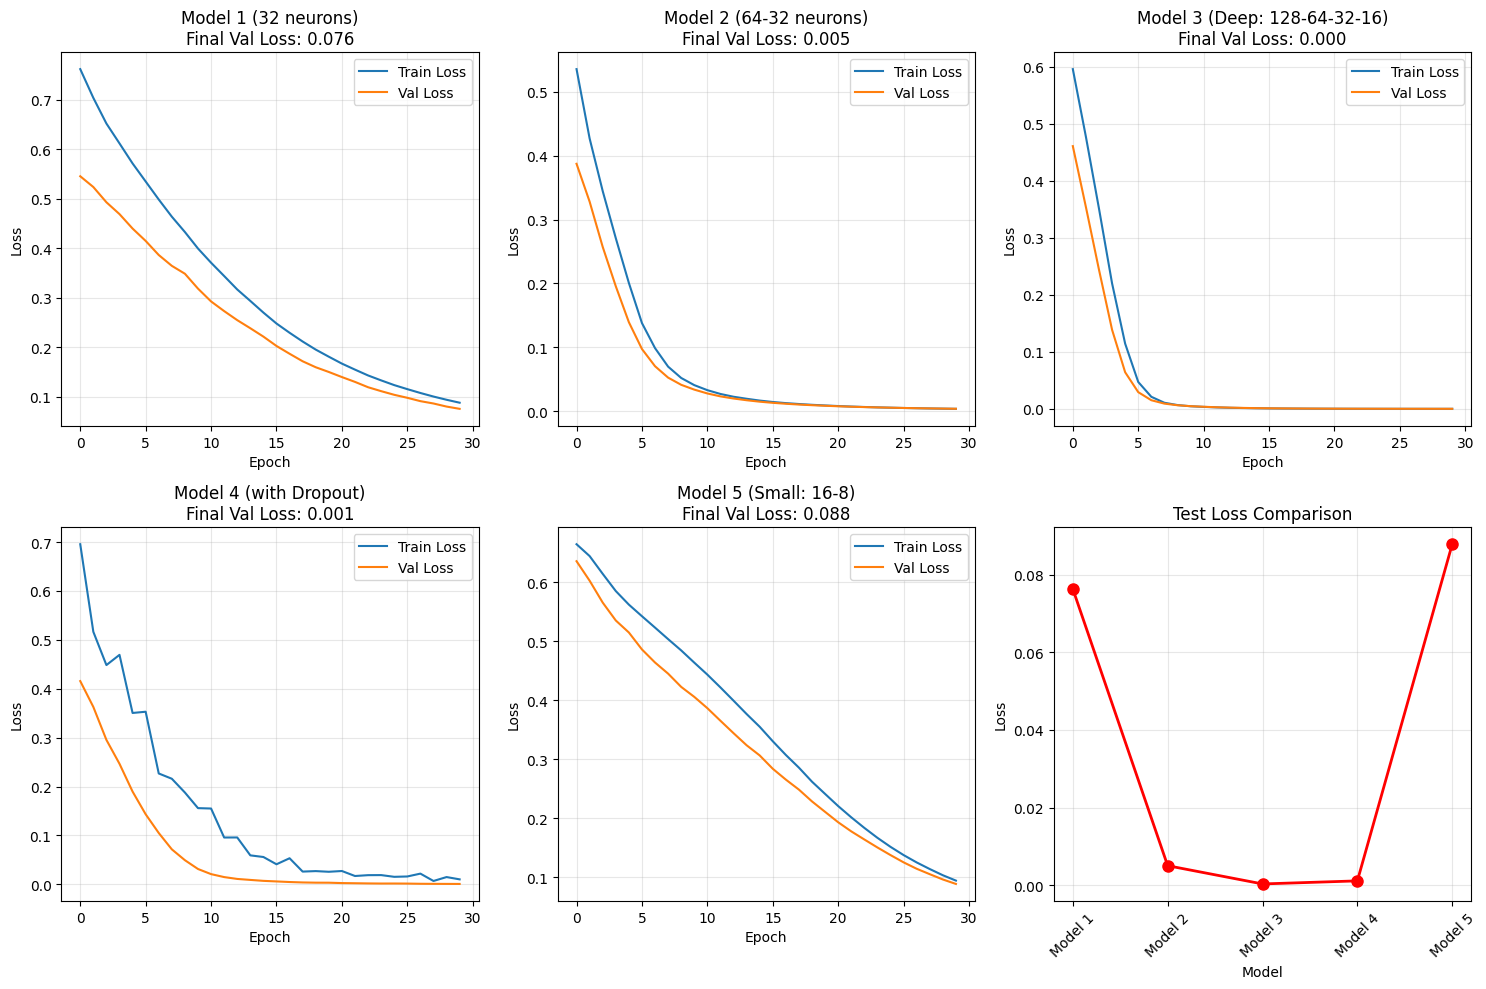

In [4]:
# Create subplots for accuracy and loss
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Plot each model's training history
for idx, (name, history) in enumerate(histories.items()):
    # Accuracy plot
    axes[idx].plot(history.history['accuracy'], label='Train Accuracy')
    axes[idx].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[idx].set_title(f'{name}\nFinal Val Acc: {results[name]["test_accuracy"]:.3f}')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Add overall comparison plot
axes[5].plot([results[name]['test_accuracy'] for name in models.keys()],
            marker='o', linestyle='-', linewidth=2, markersize=8)
axes[5].set_title('Test Accuracy Comparison')
axes[5].set_xlabel('Model')
axes[5].set_ylabel('Accuracy')
axes[5].set_xticks(range(len(models)))
axes[5].set_xticklabels([m.split('(')[0].strip() for m in models.keys()], rotation=45)
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create loss plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, history) in enumerate(histories.items()):
    # Loss plot
    axes[idx].plot(history.history['loss'], label='Train Loss')
    axes[idx].plot(history.history['val_loss'], label='Val Loss')
    axes[idx].set_title(f'{name}\nFinal Val Loss: {results[name]["test_loss"]:.3f}')
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel('Loss')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Add overall loss comparison
axes[5].plot([results[name]['test_loss'] for name in models.keys()],
            marker='o', linestyle='-', linewidth=2, markersize=8, color='red')
axes[5].set_title('Test Loss Comparison')
axes[5].set_xlabel('Model')
axes[5].set_ylabel('Loss')
axes[5].set_xticks(range(len(models)))
axes[5].set_xticklabels([m.split('(')[0].strip() for m in models.keys()], rotation=45)
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
print("SUMMARY OF ALL MODELS")


summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['test_accuracy'] for name in results.keys()],
    'Test Loss': [results[name]['test_loss'] for name in results.keys()],
    'Accuracy Score': [results[name]['accuracy_score'] for name in results.keys()],
    'Best Epoch (Val Acc)': [np.argmax(histories[name].history['val_accuracy']) + 1
                             for name in results.keys()]
})

print(summary_df.to_string(index=False))

# Find best model
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

SUMMARY OF ALL MODELS
                       Model  Test Accuracy  Test Loss  Accuracy Score  Best Epoch (Val Acc)
        Model 1 (32 neurons)            1.0   0.076285             1.0                    10
     Model 2 (64-32 neurons)            1.0   0.005045             1.0                     3
Model 3 (Deep: 128-64-32-16)            1.0   0.000347             1.0                     3
      Model 4 (with Dropout)            1.0   0.001138             1.0                     4
       Model 5 (Small: 16-8)            1.0   0.087803             1.0                    15

🎯 BEST MODEL: Model 1 (32 neurons)
   Accuracy: 1.0000


# LAB 13

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
EVALUATION METRICS FOR NEURAL NETWORK MODEL
1. Accuracy: 1.0000

2. Confusion Matrix:
        Predicted      
       No       Yes    
Actual No     30        0     
Actual Yes    0         15    

   True Negative (TN): 30
   False Positive (FP): 0
   False Negative (FN): 0
   True Positive (TP): 15

3. Derived Metrics from Confusion Matrix:
   Precision = TP/(TP+FP) = 15/15 = 1.0000
   Recall/Sensitivity = TP/(TP+FN) = 15/15 = 1.0000
   Specificity = TN/(TN+FP) = 30/30 = 1.0000
   Accuracy = (TP+TN)/(TP+TN+FP+FN) = 45/45 = 1.0000


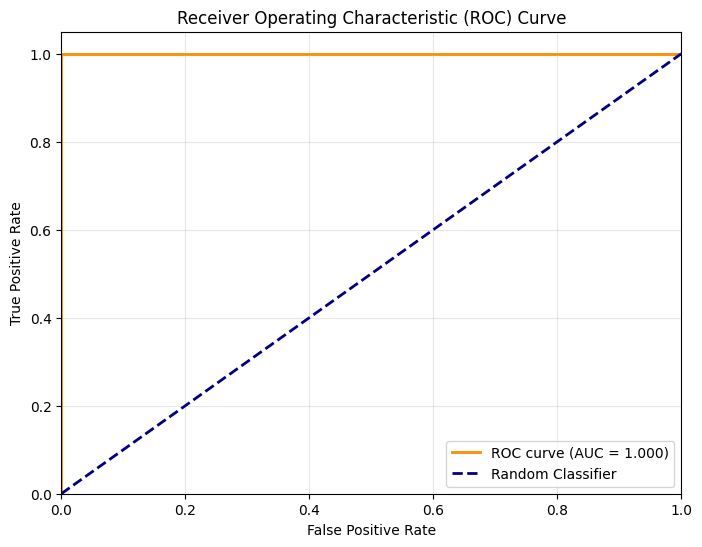


4. ROC-AUC Score: 1.0000
   Interpretation: Excellent classifier

5. F1 Score Calculation:
   Precision = 1.0000
   Recall = 1.0000
   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
             = 2 * (1.0000 * 1.0000) / (1.0000 + 1.0000)
             = 1.0000

6. Regression-style Metrics (on probabilities):
   Mean Absolute Error (MAE): 0.0713
   Mean Squared Error (MSE): 0.0090
   Root Mean Squared Error (RMSE): 0.0947

7. Complete Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        30
     Class 1       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



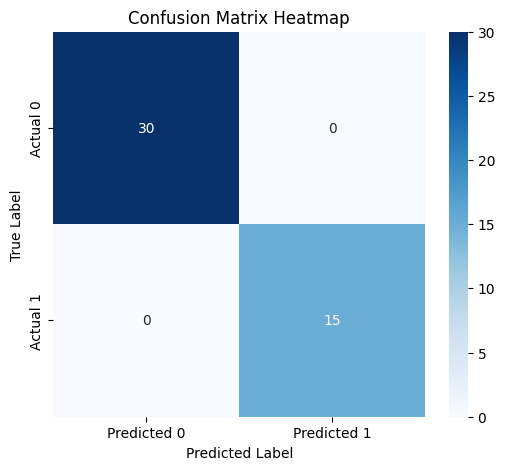

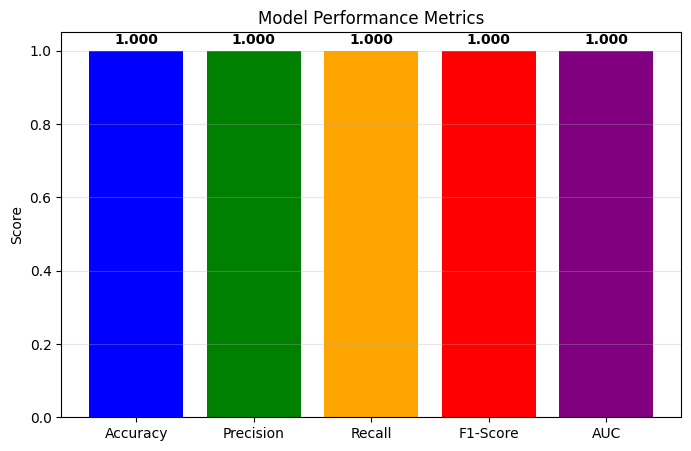

In [6]:
#
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_score, recall_score, f1_score, classification_report,
    mean_absolute_error, mean_squared_error
)


best_model = models[best_model_name]


y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("EVALUATION METRICS FOR NEURAL NETWORK MODEL")

#  Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"1. Accuracy: {accuracy:.4f}")

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n2. Confusion Matrix:")
print("   " + "Predicted".center(20))
print("   " + "No".center(10) + "Yes".center(10))
print("Actual No " + f"{cm[0,0]:^10}{cm[0,1]:^10}")
print("Actual Yes" + f"{cm[1,0]:^10}{cm[1,1]:^10}")


TN, FP, FN, TP = cm.ravel()

print(f"\n   True Negative (TN): {TN}")
print(f"   False Positive (FP): {FP}")
print(f"   False Negative (FN): {FN}")
print(f"   True Positive (TP): {TP}")


print(f"\n3. Derived Metrics from Confusion Matrix:")
print(f"   Precision = TP/(TP+FP) = {TP}/{TP+FP} = {TP/(TP+FP):.4f}")
print(f"   Recall/Sensitivity = TP/(TP+FN) = {TP}/{TP+FN} = {TP/(TP+FN):.4f}")
print(f"   Specificity = TN/(TN+FP) = {TN}/{TN+FP} = {TN/(TN+FP):.4f}")
print(f"   Accuracy = (TP+TN)/(TP+TN+FP+FN) = {TP+TN}/{TP+TN+FP+FN} = {accuracy:.4f}")

#  ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n4. ROC-AUC Score: {auc_score:.4f}")
print(f"   Interpretation: {'Excellent' if auc_score > 0.9 else 'Good' if auc_score > 0.8 else 'Fair'} classifier")

#  F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n5. F1 Score Calculation:")
print(f"   Precision = {precision:.4f}")
print(f"   Recall = {recall:.4f}")
print(f"   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)")
print(f"             = 2 * ({precision:.4f} * {recall:.4f}) / ({precision:.4f} + {recall:.4f})")
print(f"             = {f1:.4f}")

#  Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred_proba)

print(f"\n6. Regression-style Metrics (on probabilities):")
print(f"   Mean Absolute Error (MAE): {mae:.4f}")
print(f"   Mean Squared Error (MSE): {mse:.4f}")
print(f"   Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

#  Classification Report
print(f"\n7. Complete Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

#. Visualize confusion matrix with heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#  Metrics comparison chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc_score]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1.05])

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.show()

